In [400]:
!pip install xgboost

In [415]:
import numpy as np
import pandas as pd

In [416]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [417]:
df = pd.read_csv('Dataset/spaceship-titanic/train.csv')

In [418]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
PassengerId     8693 non-null object
HomePlanet      8492 non-null object
CryoSleep       8476 non-null object
Cabin           8494 non-null object
Destination     8511 non-null object
Age             8514 non-null float64
VIP             8490 non-null object
RoomService     8512 non-null float64
FoodCourt       8510 non-null float64
ShoppingMall    8485 non-null float64
Spa             8510 non-null float64
VRDeck          8505 non-null float64
Name            8493 non-null object
Transported     8693 non-null bool
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [420]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [421]:
df.shape

(8693, 14)

In [422]:
corr = df.corr()

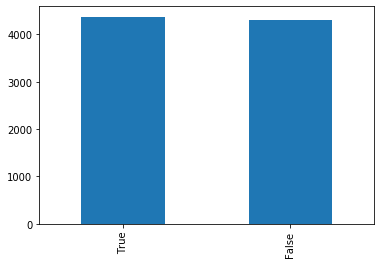

In [423]:
import matplotlib.pyplot as plt
plot_df = df.Transported.value_counts()
plot_df.plot(kind="bar")

In [424]:
df.Name.isnull().sum()

200

In [425]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [426]:
df=df[~(df.Name.isnull())]
df.Name.isna().sum()

0

In [427]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [428]:
df.drop(['PassengerId','Name', 'ShoppingMall', 'Spa'], axis = 1, inplace = True)

In [429]:
X = df.drop(columns=['Transported'])

In [430]:
X

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,VRDeck
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,44.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,49.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,193.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,2.0
...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,74.0
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,0.0
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,3235.0


In [431]:
y= df.Transported

In [432]:
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 8493, dtype: bool

In [433]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8493 entries, 0 to 8692
Data columns (total 10 columns):
HomePlanet     8299 non-null object
CryoSleep      8286 non-null object
Cabin          8296 non-null object
Destination    8315 non-null object
Age            8317 non-null float64
VIP            8291 non-null object
RoomService    8313 non-null float64
FoodCourt      8315 non-null float64
VRDeck         8309 non-null float64
Transported    8493 non-null bool
dtypes: bool(1), float64(4), object(5)
memory usage: 671.8+ KB


In [434]:
df.duplicated().sum()

16

In [435]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,3235.0,False


In [436]:
df.Age.mean()

28.846338824095227

In [437]:
df.RoomService.mean()

224.11018886082041

In [438]:
df.FoodCourt.mean()

457.97787131689716

In [439]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Age,8317,28.8463,14.4635,0,19,27,38,79
RoomService,8313,224.11,666.019,0,0,0,46,14327
FoodCourt,8315,457.978,1614.08,0,0,0,78,29813
VRDeck,8309,302.019,1117.97,0,0,0,46,20336


In [440]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,2.0,True


In [524]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

In [498]:
X_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,VRDeck
6412,Earth,True,G/1100/P,TRAPPIST-1e,6.0,False,0.0,0.0,0.0
4727,Earth,False,G/826/S,TRAPPIST-1e,23.0,False,0.0,381.0,261.0
6198,Earth,False,F/1360/P,PSO J318.5-22,39.0,False,0.0,0.0,744.0
6521,Earth,False,G/1122/S,TRAPPIST-1e,32.0,False,0.0,326.0,545.0
1071,Europa,True,B/42/P,TRAPPIST-1e,49.0,False,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5877,Earth,False,G/1006/S,55 Cancri e,8.0,False,0.0,0.0,0.0
5319,Europa,True,B/218/S,TRAPPIST-1e,62.0,False,0.0,0.0,0.0
5521,Mars,False,F/1216/P,TRAPPIST-1e,24.0,False,10.0,49.0,10.0
880,Mars,False,F/196/P,TRAPPIST-1e,18.0,False,594.0,0.0,0.0


In [499]:
df.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [500]:
df.CryoSleep.unique()

array([False, True, nan], dtype=object)

In [501]:
df.Cabin.unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

In [502]:
df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [503]:
df.VIP.unique()

array([False, True, nan], dtype=object)

In [504]:
#X_train.Name.isnull().sum()

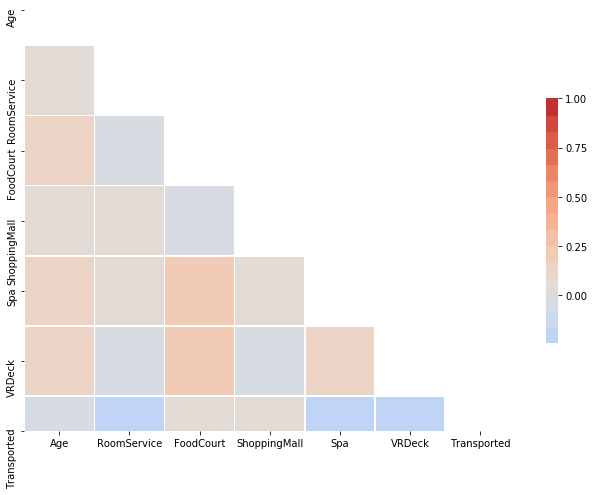

In [505]:
import seaborn as sns
import matplotlib.pyplot as plt
cmap = sns.color_palette("coolwarm", 24)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

# Making Column Transformer

In [506]:
# imputation transformer

trf1 = ColumnTransformer([
    ('impute_age',SimpleImputer(),[4]),
    ('impute_room_Service',SimpleImputer(),[6]),
    ('impute_food_court',SimpleImputer(),[7]),
    ('impute_VRDeck',SimpleImputer(),[8]),
    ('impute_HomePlanet',SimpleImputer(strategy='most_frequent'),[0]),
    ('impute_Cryosleep',SimpleImputer(strategy='most_frequent'),[1]),
    ('impute_Cabin',SimpleImputer(strategy='most_frequent'),[2]),
    ('impute_destination',SimpleImputer(strategy='most_frequent'),[3]),
    ('impute_VIP',SimpleImputer(strategy='most_frequent'),[5]),
],remainder='passthrough')


In [507]:
X_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,VRDeck
6412,Earth,True,G/1100/P,TRAPPIST-1e,6.0,False,0.0,0.0,0.0
4727,Earth,False,G/826/S,TRAPPIST-1e,23.0,False,0.0,381.0,261.0
6198,Earth,False,F/1360/P,PSO J318.5-22,39.0,False,0.0,0.0,744.0
6521,Earth,False,G/1122/S,TRAPPIST-1e,32.0,False,0.0,326.0,545.0
1071,Europa,True,B/42/P,TRAPPIST-1e,49.0,False,0.0,0.0,0.0


In [508]:
# one hot encoding
trf2  = ColumnTransformer([
    ("onehot_categorical", OneHotEncoder(sparse = False,handle_unknown='ignore'), [0])],
    remainder= "passthrough")


In [509]:
X_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,VRDeck
6412,Earth,True,G/1100/P,TRAPPIST-1e,6.0,False,0.0,0.0,0.0
4727,Earth,False,G/826/S,TRAPPIST-1e,23.0,False,0.0,381.0,261.0
6198,Earth,False,F/1360/P,PSO J318.5-22,39.0,False,0.0,0.0,744.0
6521,Earth,False,G/1122/S,TRAPPIST-1e,32.0,False,0.0,326.0,545.0
1071,Europa,True,B/42/P,TRAPPIST-1e,49.0,False,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5877,Earth,False,G/1006/S,55 Cancri e,8.0,False,0.0,0.0,0.0
5319,Europa,True,B/218/S,TRAPPIST-1e,62.0,False,0.0,0.0,0.0
5521,Mars,False,F/1216/P,TRAPPIST-1e,24.0,False,10.0,49.0,10.0
880,Mars,False,F/196/P,TRAPPIST-1e,18.0,False,594.0,0.0,0.0


In [510]:
# Scaling
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])

In [511]:
trf4 = SelectKBest(score_func=chi2,k=9)

In [512]:
trf5 = XGBClassifier()

In [513]:
X_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,VRDeck
6412,Earth,True,G/1100/P,TRAPPIST-1e,6.0,False,0.0,0.0,0.0
4727,Earth,False,G/826/S,TRAPPIST-1e,23.0,False,0.0,381.0,261.0
6198,Earth,False,F/1360/P,PSO J318.5-22,39.0,False,0.0,0.0,744.0
6521,Earth,False,G/1122/S,TRAPPIST-1e,32.0,False,0.0,326.0,545.0
1071,Europa,True,B/42/P,TRAPPIST-1e,49.0,False,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5877,Earth,False,G/1006/S,55 Cancri e,8.0,False,0.0,0.0,0.0
5319,Europa,True,B/218/S,TRAPPIST-1e,62.0,False,0.0,0.0,0.0
5521,Mars,False,F/1216/P,TRAPPIST-1e,24.0,False,10.0,49.0,10.0
880,Mars,False,F/196/P,TRAPPIST-1e,18.0,False,594.0,0.0,0.0


# Create Pipe Line

In [514]:
pipe = Pipeline([
                ('trf1',trf1),
                ('trf2',trf2),
                ('trf3',trf3),
                ('trf4',trf4),
                ('trf5',trf5)
            ])

In [515]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [4]),
                                                 ('impute_room_Service',
                                                  SimpleImputer(), [6]),
                                                 ('impute_food_court',
                                                  SimpleImputer(), [7]),
                                                 ('impute_VRDeck',
                                                  SimpleImputer(), [8]),
                                                 ('impute_HomePlanet',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0]),
                                                 ('impute_Cryosleep',
                                                  SimpleImputer(strategy='m...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [516]:
y_train

6412    False
4727    False
6198    False
6521    False
1071     True
        ...  
5877     True
5319     True
5521    False
880     False
7444    False
Name: Transported, Length: 6794, dtype: bool

In [517]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('impute_age', SimpleImputer(), [4]),
                                 ('impute_room_Service', SimpleImputer(), [6]),
                                 ('impute_food_court', SimpleImputer(), [7]),
                                 ('impute_VRDeck', SimpleImputer(), [8]),
                                 ('impute_HomePlanet',
                                  SimpleImputer(strategy='most_frequent'), [0]),
                                 ('impute_Cryosleep',
                                  SimpleImputer(strategy='most_frequent'), [1]),
                                 ('impute_Cabin',
                                  SimpleImputer(strategy='most_frequent'), [2]),
                                 ('impute_destination',
                                  SimpleImputer(strategy='most_frequent'), [3]),
                                 ('impute_VIP',
                                  SimpleImputer(strategy='

In [518]:
from sklearn import set_config
set_config(display="diagram")
pipe

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age', SimpleImputer(),
                                                  [4]),
                                                 ('impute_room_Service',
                                                  SimpleImputer(), [6]),
                                                 ('impute_food_court',
                                                  SimpleImputer(), [7]),
                                                 ('impute_VRDeck',
                                                  SimpleImputer(), [8]),
                                                 ('impute_HomePlanet',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [0]),
                                                 ('impute_Cryosleep',
                                                  SimpleImputer(strategy='m...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               predictor='auto', random_state=0, reg_alpha=0,
                               reg_lambda=1, ...))])

In [519]:
y_pred = pipe.predict(X_train)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [520]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.5273770974389167

In [521]:
# cross validation using cross_val_score
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean()

0.5263459335624284

In [522]:
# GridSearch using Pipeline

In [523]:
# gridsearchcv
params = {
    'trf5__max_depth':[1,2,3,4,5,None]
}

In [468]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_age',
                                                                         SimpleImputer(),
                                                                         [4]),
                                                                        ('impute_room_Service',
                                                                         SimpleImputer(),
                                                                         [6]),
                                                                        ('impute_food_court',
                                                                         SimpleImputer(),
                                                                         [7]),
                                                                        ('impute_VRDeck',
                                                                         SimpleImputer(),
                                                                         [8]),
                                                                        ('impute_HomePlanet',
                                                                         SimpleImputer(strategy='most_frequent'),
                                                                         [0]),
                                                                        ('impute_Cryoslee...
                                                      interaction_constraints='',
                                                      learning_rate=0.300000012,
                                                      max_bin=256,
                                                      max_cat_to_onehot=4,
                                                      max_delta_step=0,
                                                      max_depth=6, max_leaves=0,
                                                      min_child_weight=1,
                                                      missing=nan,
                                                      monotone_constraints='()',
                                                      n_estimators=100,
                                                      n_jobs=0,
                                                      num_parallel_tree=1,
                                                      predictor='auto',
                                                      random_state=0,
                                                      reg_alpha=0, reg_lambda=1, ...))]),
             param_grid={'trf5__max_depth': [1, 2, 3, 4, 5, None]},
             scoring='accuracy')

In [469]:
grid.best_score_

0.5237872440655517

In [470]:
grid.best_params_

{'trf5__max_depth': 1}